# Purpose

Validating the following statement I read in a 2020 news article:
- "Looking at data going back to 1930, the firm found that if an investor missed the S&P500's 10 best days each decade, the total return would stand at 28%. If, on the other hand, the investor held steady through the ups and downs, the return would have been 17,715%."
- source: https://www.cnbc.com/2021/03/24/this-chart-shows-why-investors-should-never-try-to-time-the-stock-market.html

My findings as of 6/3/2022:
- I capped date around 2020-02-25 to get the ~17,715% cum_prod claimed
- Taking out the 10 best returns per decade (starting from 1930) and recalculating the cum_prod though, I get 131% (231% minus initial investment of 1) instead of 28%
- It appears the news article compounded the returns every decade whereas I compound every day, so that is the discrepancy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Since 1930

In [2]:
df = pd.read_csv(r'SPX_1_8_2021.csv')
df['Return'] = df['Adj Close'] / df['Adj Close'].shift(1) - 1
df['Investment_value'] = (1+df['Return']).cumprod()
df[df.Date < '2020-02-25']

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Investment_value
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663,1.005663
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252,1.003397
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594,0.993771
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268,1.000000
...,...,...,...,...,...,...,...,...,...
23140,2020-02-18,3369.040039,3375.010010,3355.610107,3370.290039,3370.290039,3746720000,-0.002920,190.843151
23141,2020-02-19,3380.389893,3393.520020,3378.830078,3386.149902,3386.149902,3600150000,0.004706,191.741218
23142,2020-02-20,3380.449951,3389.149902,3341.020020,3373.229980,3373.229980,4007320000,-0.003816,191.009625
23143,2020-02-21,3360.500000,3360.760010,3328.449951,3337.750000,3337.750000,3899270000,-0.010518,189.000566


# Obtain best 10 days per decade

In [3]:
best_indices = []
for year in range(1930, 2021, 10):
    best_indices += [ind for ind in df[(df.Date.str[:4]>=str(year))&\
                    (df.Date.str[:4]<str(year+10))].Return.sort_values()[-10:].index]
    print(year)
    display(df[df.Date.str[:4]==str(year)].Return.sort_values()[-10:])

1930


657    0.026786
610    0.028150
624    0.032812
586    0.033943
705    0.035006
633    0.039416
689    0.044648
741    0.046399
617    0.046828
562    0.050518
Name: Return, dtype: float64

1940


3157    0.017946
3116    0.019173
3166    0.020833
3097    0.024017
3110    0.024742
3141    0.024802
3179    0.029273
3107    0.047831
3108    0.049894
3211    0.055607
Name: Return, dtype: float64

1950


5577    0.014477
5645    0.014884
5602    0.015054
5727    0.016316
5731    0.016495
5686    0.017294
5632    0.017585
5742    0.019076
5631    0.022782
5736    0.026901
Name: Return, dtype: float64

1960


8215    0.010745
8114    0.011737
8091    0.012932
8040    0.013992
8028    0.015368
8214    0.016283
8196    0.017104
8152    0.017226
8224    0.019512
8073    0.020589
Name: Return, dtype: float64

1970


10658    0.017986
10577    0.019185
10589    0.019353
10553    0.020345
10611    0.021051
10659    0.022085
10626    0.024849
10598    0.025285
10599    0.026002
10597    0.050224
Name: Return, dtype: float64

1980


13075    0.017993
13156    0.018415
13215    0.018557
13090    0.018874
13129    0.019003
13192    0.019234
13026    0.020036
13083    0.025046
13241    0.025370
13099    0.036373
Name: Return, dtype: float64

1990


15550    0.017799
15769    0.018295
15782    0.018330
15571    0.018887
15768    0.019928
15753    0.022045
15752    0.023363
15641    0.023791
15739    0.029048
15715    0.031877
Name: Return, dtype: float64

2000


18124    0.025602
18082    0.027090
18152    0.028663
18180    0.032242
18151    0.033084
18156    0.033276
18276    0.033381
18280    0.034743
18312    0.038922
18129    0.047646
Name: Return, dtype: float64

2010


20823    0.021617
20738    0.022023
20731    0.022513
20705    0.023494
20696    0.025843
20760    0.029505
20702    0.029507
20720    0.031331
20693    0.032876
20680    0.043974
Name: Return, dtype: float64

2020


23169    0.033516
23176    0.034056
23151    0.042203
23149    0.046039
23155    0.049396
23160    0.059955
23167    0.062414
23174    0.070331
23158    0.092871
23165    0.093828
Name: Return, dtype: float64

# Omit best 10 days per decade

In [4]:
df_missed = df.copy(deep=True)

df_missed.drop(index=best_indices, inplace=True)
df_missed['Investment_value'] = (1+df_missed['Return']).cumprod()

df_missed[df_missed.Date < '2019-12-01']

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Investment_value
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663,1.005663
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252,1.003397
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594,0.993771
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268,1.000000
...,...,...,...,...,...,...,...,...,...
23083,2019-11-22,3111.409912,3112.870117,3099.260010,3110.290039,3110.290039,3226780000,0.002175,2.290570
23084,2019-11-25,3117.439941,3133.830078,3117.439941,3133.639893,3133.639893,3511530000,0.007507,2.307766
23085,2019-11-26,3134.850098,3142.689941,3131.000000,3140.520020,3140.520020,4595590000,0.002196,2.312833
23086,2019-11-27,3145.489990,3154.260010,3143.409912,3153.629883,3153.629883,3033090000,0.004174,2.322488


# Plot results

In [23]:
df.index = pd.to_datetime(df.set_index('Date').index)
df_missed.index = pd.to_datetime(df_missed.set_index('Date').index)

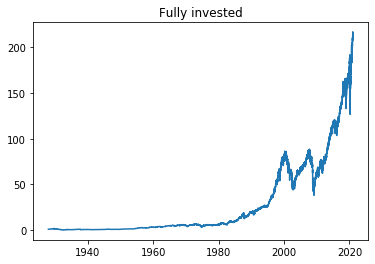

In [24]:
plt.title('Fully invested')
plt.plot(df.Investment_value)
plt.show()

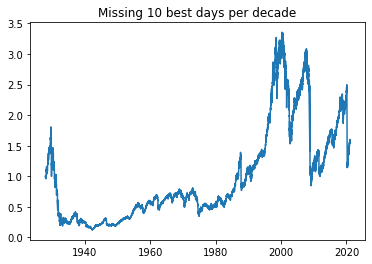

In [25]:
plt.title('Missing 10 best days per decade')
plt.plot(df_missed.Investment_value)
plt.show()

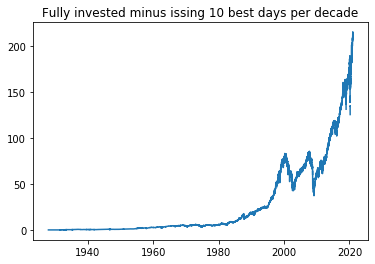

In [26]:
plt.title('Fully invested minus issing 10 best days per decade')
plt.plot(df.Investment_value - df_missed.Investment_value)
plt.show()